# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


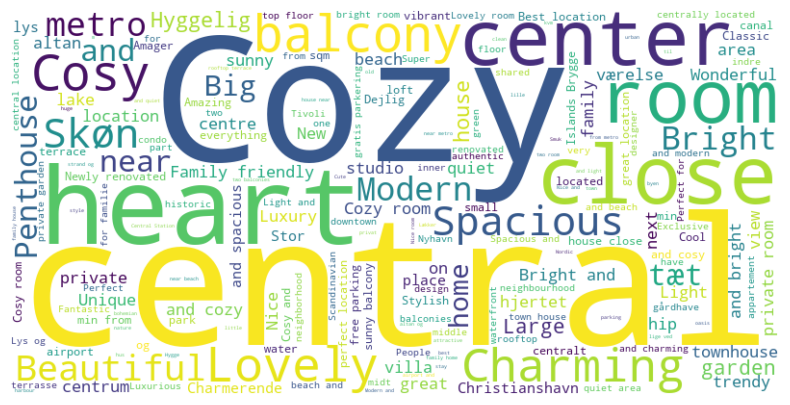

In [43]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

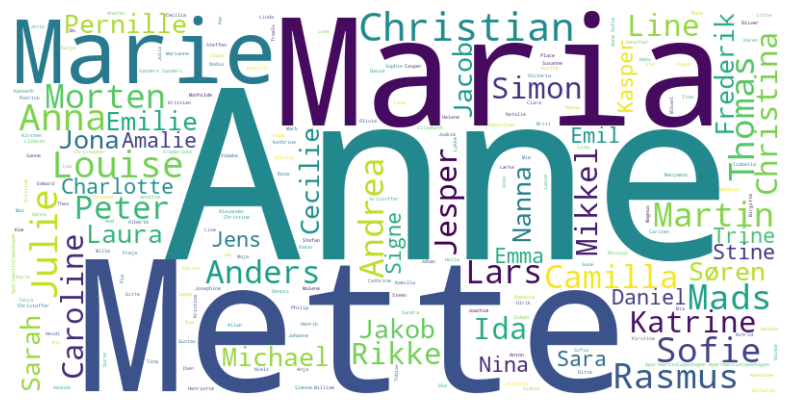

In [44]:
# State your solution here. Add more cells if needed.

# Stop words list was created so that they would not appear in the wordcloud
host_names_text = ' '.join(data_filtered['host_name'])
stop_words = ['Apartment', 'Denmark', 'A', 'Rent', 'Og', 'This']

# Create and generate a word cloud image for host names
host_wordcloud = WordCloud(stopwords = stop_words, background_color="white", width=800, height=400).generate(host_names_text)

# Display the generated word cloud for host names
plt.figure(figsize=(10, 5))
plt.imshow(host_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

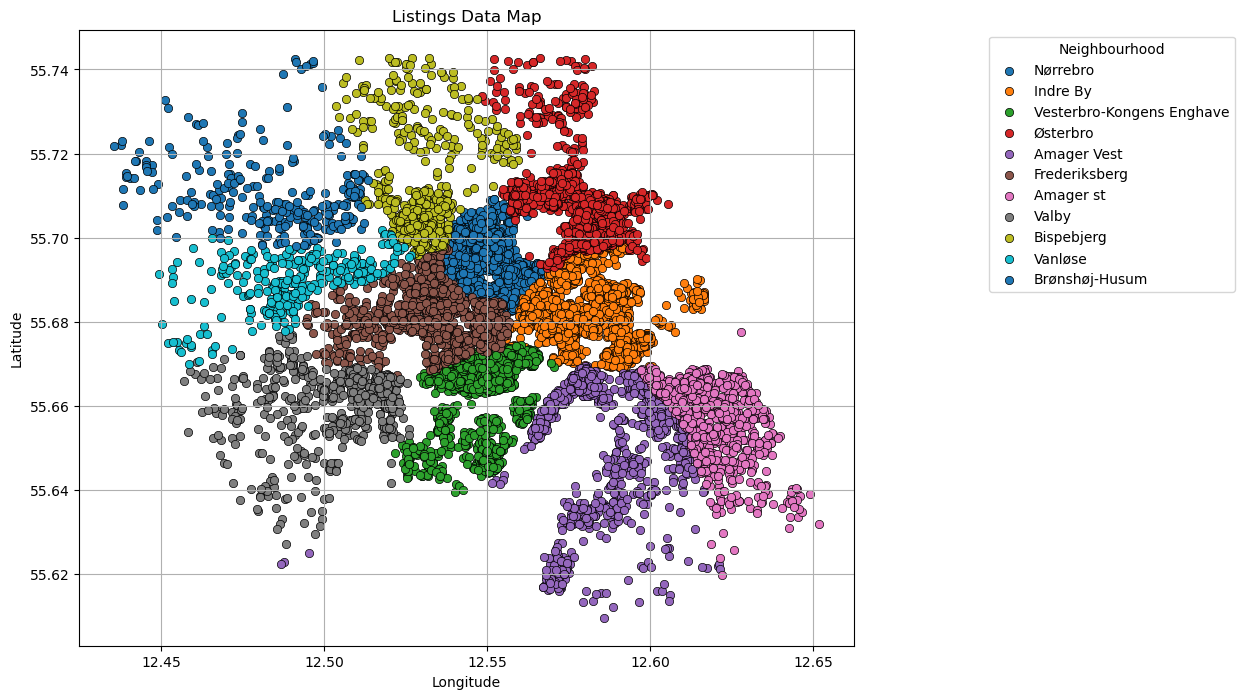

In [45]:


# Plot the listings data on a map
plt.figure(figsize=(10, 8))

#use unique values of neighbourhood_cleansed column
neighborhoods = data_filtered['neighbourhood_cleansed'].unique()

#loop for displaying different neighborhoods with different colors
for neighborhood in neighborhoods:
    neighborhood_data = data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]
    plt.scatter(neighborhood_data['longitude'], neighborhood_data['latitude'], label=neighborhood, edgecolor='black', linewidth=0.5)


plt.title('Listings Data Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Table to show color and which neighbourhood it resembles
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.5, 1),loc='upper right')

plt.grid(True)
plt.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

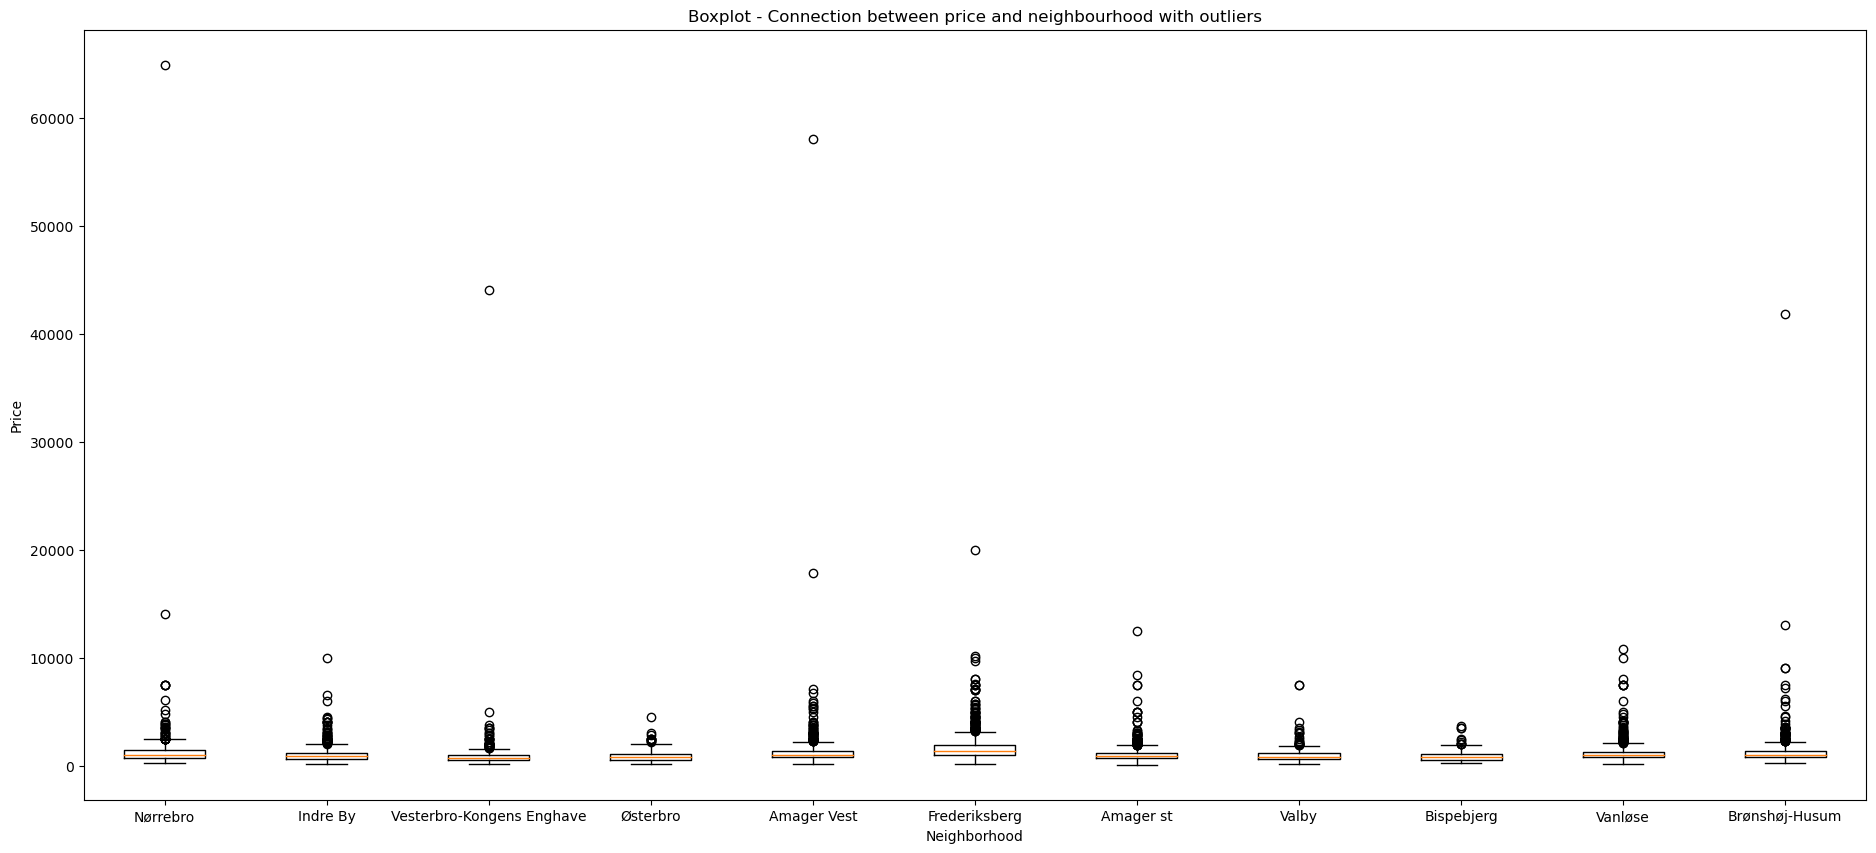

In [46]:


# Create boxplot
plt.figure(figsize=(23,10))
plt.title('Boxplot - Connection between price and neighbourhood with outliers')

#Grouping neighbourhood to get the list of prices for each of them and then extracting the prices
grouped_neighbourhood = data_filtered.groupby('neighbourhood_cleansed')['price'].apply(list)
prices = grouped_neighbourhood.tolist()

#Showfliers is set to true so that it shows the outliers in the boxplot
plt.boxplot(prices, labels=neighborhoods, showfliers=True)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()



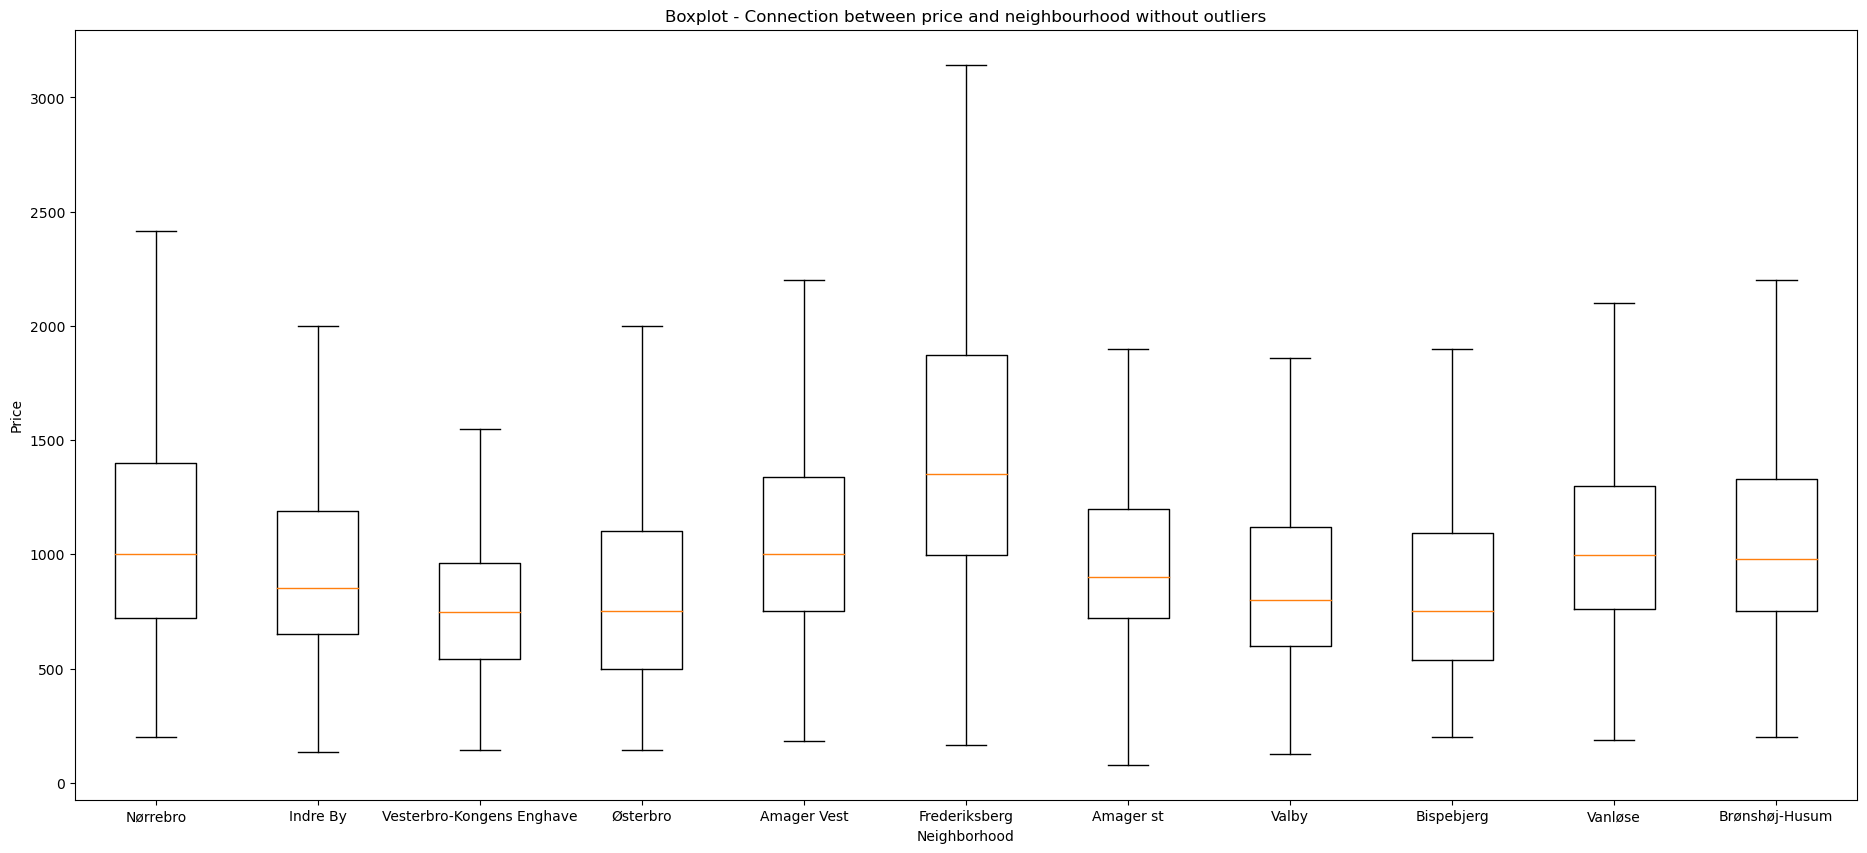

In [47]:
plt.figure(figsize=(23,10))
plt.title('Boxplot - Connection between price and neighbourhood without outliers')

#Set showfliers to false not to show the outliers
plt.boxplot(prices, labels=neighborhoods, showfliers=False)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

#To make the data more visually understandable, I decided that I want to look at data where prices dont go above 3000DKK
# Sorting the data so that it shows the places where price does not go above 3000 DKK 
data_filtered = data_filtered[(data_filtered['price'] >= 0) & (data_filtered['price'] <= 3000)]
plt.show()


### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [48]:
#Analysis of the neighborhoods on room type and price.
#Describe() method is used as efficient way to calculate statistics on count, mean, standard deviation, min, max and quartiles
summary = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe()

mode_price = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].agg(lambda x: x.mode().iloc[0])

median_price = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].median()

#combine the results together
summary_combined = pd.concat([summary, mode_price, median_price], axis=1)
summary_combined.columns = ['count', 'mean', 'mode', 'median', 'std', 'min', 'max', 'Q1', 'Q2', 'Q3']

display(summary_combined)


count         mean        mode  \
neighbourhood_cleansed    room_type                                          
Amager Vest               Entire home/apt   890.0  1148.329213  462.545956   
                          Private room      147.0   598.496599  378.839674   
                          Shared room         2.0  1051.500000  112.429978   
Amager st                 Entire home/apt   775.0  1021.985806  470.637767   
                          Hotel room          3.0  1296.000000  211.184753   
                          Private room      129.0   549.325581  293.995992   
                          Shared room         1.0  2575.000000         NaN   
Bispebjerg                Entire home/apt   501.0   873.628743  415.204805   
                          Private room       95.0   488.978947  353.674089   
                          Shared room         1.0   198.000000         NaN   
Brønshøj-Husum            Entire home/apt   215.0   998.962791  504.411166   
                          Private room       67.0   445.552239  201.631624   
                          Shared room         2.0   211.500000   16.263456   
Frederiksberg             Entire home/apt  1020.0  1152.318627  485.870334   
                          Private room      130.0   543.353846  208.769034   
Indre By                  Entire home/apt  1605.0  1457.540810  560.145522   
                          Hotel room         10.0  1077.200000  654.255098   
                          Private room      128.0   698.984375  380.070466   
                          Shared room         4.0   292.000000   67.577116   
Nørrebro                  Entire home/apt  1875.0  1015.906667  403.951055   
                          Private room      163.0   575.889571  303.411427   
                          Shared room         3.0   324.666667  130.481161   
Valby                     Entire home/apt   443.0   962.340858  395.548790   
                          Private room       89.0   498.157303  288.616366   
Vanløse                   Entire home/apt   251.0   923.430279  409.770236   
                          Private room       44.0   413.409091  194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1784.0  1122.557175  438.276450   
                          Private room      221.0   574.366516  295.726896   
                          Shared room         2.0   330.500000  113.844192   
Østerbro                  Entire home/apt  1151.0  1137.412685  500.980101   
                          Private room      129.0   583.782946  362.100663   
                          Shared room         1.0   469.000000         NaN   

                                           median      std     min      max  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   800.00  1050.0  1435.50   
                          Private room      200.0   400.00   500.0   650.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   796.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.50   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   810.00  1012.0  1351.50   
                          Private room      185.0   399.25   500.0   700.00   
Indre By                  Entire home/apt   350.

### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Drop columents that are not relevant for the model, price is dropped because it is used to create target variable
drop_columns = [
    "id",
    "name",
    "host_id"  ,
    "host_name" , 
    "price"  ,
    "last_review",
    ]

df = data_filtered.drop(drop_columns, axis=1)

X = df.drop('price_category', axis=1)
y = df['price_category']

# Pd.get_dummies method is used because neighbourhood_cleansed and room_type contains strings. In such way we convert the variables into a format that machine learning models can understand
X = pd.get_dummies(X, columns=['neighbourhood_cleansed', 'room_type'], dtype=float, drop_first=True)

# Correlation matrix to find the features that correlate with each other
X.corr()

,latitude,longitude,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,neighbourhood_cleansed_Frederiksberg,neighbourhood_cleansed_Indre By,neighbourhood_cleansed_Nørrebro,neighbourhood_cleansed_Valby,neighbourhood_cleansed_Vanløse,neighbourhood_cleansed_Vesterbro-Kongens Enghave,neighbourhood_cleansed_Østerbro,room_type_Hotel room,room_type_Private room,room_type_Shared room
latitude,1.000000,-0.254431,0.009596,-0.042499,-0.005476,-0.009065,-0.024669,0.004921,0.003213,-0.026373,...,0.019000,0.016864,0.291872,-0.216623,0.066834,-0.350660,0.454400,-0.015124,-0.030110,0.008173
longitude,-0.254431,1.000000,0.005582,0.063843,0.000105,0.006882,-0.000300,-0.009617,-0.009709,0.146074,...,-0.241696,0.283933,-0.106710,-0.370236,-0.324685,-0.123154,0.210212,0.030070,-0.043263,0.005853
minimum_nights,0.009596,0.005582,1.000000,-0.013906,-0.014991,-0.014965,-0.021502,-0.002623,-0.000140,-0.000579,...,0.001027,0.004360,0.011651,-0.006207,-0.002934,-0.000406,0.001563,-0.006797,-0.000637,-0.005846
number_of_reviews,-0.042499,0.063843,-0.013906,1.000000,-0.039062,-0.003537,0.032423,0.012950,-0.010644,-0.017260,...,-0.034847,0.124089,-0.036432,-0.029614,0.003841,0.015488,-0.043558,0.039309,0.193081,0.053227
review_scores_rating,-0.005476,0.000105,-0.014991,-0.039062,1.000000,0.675516,0.653705,0.487502,0.560581,0.391206,...,0.029519,-0.050803,0.003458,-0.029558,-0.017512,0.039602,0.010969,-0.033575,-0.038481,-0.037115
review_scores_accuracy,-0.009065,0.006882,-0.014965,-0.003537,0.675516,1.000000,0.564441,0.530357,0.557612,0.356447,...,0.025955,-0.033026,-0.000838,-0.031372,-0.012525,0.022096,-0.006155,-0.014287,-0.022458,-0.052410
review_scores_cleanliness,-0.024669,-0.000300,-0.021502,0.032423,0.653705,0.564441,1.000000,0.368664,0.389022,0.279327,...,0.021458,-0.019569,-0.003098,-0.033121,-0.005636,0.043889,-0.008254,-0.006626,0.010999,-0.014941
review_scores_checkin,0.004921,-0.009617,-0.002623,0.012950,0.487502,0.530357,0.368664,1.000000,0.605115,0.272588,...,0.016507,-0.041441,0.002446,-0.021405,0.009489,0.011349,0.006424,-0.012945,-0.010757,-0.028849
review_scores_communication,0.003213,-0.009709,-0.000140,-0.010644,0.560581,0.557612,0.389022,0.605115,1.000000,0.343557,...,0.017808,-0.058237,0.018292,-0.034340,0.010235,0.027704,-0.002179,-0.020252,-0.037953,-0.031969
review_scores_location,-0.026373,0.146074,-0.000579,-0.017260,0.391206,0.356447,0.279327,0.272588,0.343557,1.000000,...,0.044920,0.174577,0.060772,-0.128895,-0.089822,0.067488,-0.021809,0.005176,-0.077127,-0.031134


In [70]:
# From correlation matrix, we can see that features related to reviews are corelated with each other.
# Therefore, we drop them, not to confuse model + the accuraccy of the model is higher without them
drop_columns = [
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ]

X = X.drop(drop_columns, axis=1)

#Then we split the data into training, validation and test sets
# Stratify is used so that the sets have the same proportion of each class as original dataset
# Random state is for reproducibility of the results

# Split the data into training and test sets (80% train, 20% test)
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=142)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.2, stratify=y_rest, random_state=142)




In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the features and scale the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_rest = scaler.transform(X_rest)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)


# defines the grid of hyperparameters that will be searched
#'C': This hyperparameter represents the inverse of regularization strength. Smaller values specify stronger regularization.
#'penalty': This hyperparameter determines the type of regularization to be applied. 
#It can take on two values: 'l1' and 'l2'. 'l1' penalty is the Lasso regularization, while 'l2' penalty is the Ridge regularization. 
#These penalties are used to prevent overfitting by adding a penalty term to the loss function based on the magnitude of the coefficients.
# 'solver': This hyperparameter specifies the algorithm to use in the optimization problem
parameters_grid= {
    'C': [ 0.1, 1, 10, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
}


# GridSearchCV performs automatic iterations through all combinations of hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000),
                           parameters_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)  # Use all available CPU cores

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy found:  0.6722346794006713


c:\Users\migle\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\migle\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\migle\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\migle\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

In [90]:
# Train the model on combined training and validation set
# Evaluate model on the test set

# Extract best parameters from grid search results
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']
best_solver = grid_search.best_params_['solver']

# Instantiate and train the logistic regression model using best parameters
logistic_model = LogisticRegression(C=best_C, penalty=best_penalty, solver=best_solver, max_iter=1000)
logistic_model.fit(X_rest, y_rest)

# Evaluate the model on the test set and calculate the accuracy score
test_accuracy = logistic_model.score(X_test, y_test)

# Print the accuracy score on the test set
print("Accuracy on the test set:", test_accuracy)



Accuracy on the test set: 0.6975178796802692


In [102]:

# n_neighbors determines the number of neighbors to consider when making predictions with the KNN
#  It represents the number of nearest data points in the training set that are used to make a prediction for a new data point
# metric determines  the distance metric used to measure the distance between data points in the feature space.
# It is important to have a wider range of n_neighbors to avoid the risk of overfitting 
parameters_grid = {
    'n_neighbors': [11, 13, 15, 17, 19, 21, 25],
    'metric': ['euclidean', 'manhattan', "minkowski", "chebyshev" ],
}

# manual hyperparameter tuning for a k-Nearest Neighbors (KNN) classifier. 
# It evaluates the KNN model on a validation set and keeps track of the best model and its corresponding hyperparameters

best_params = {}
best_acc = 0

for k in parameters_grid['n_neighbors']:
    for m in parameters_grid['metric']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(X_train, y_train)
        if knn.score(X_val, y_val)> best_acc:
            best_acc = knn.score(X_val, y_val)
            print(f'New best accuracy: {best_acc}')
            best_params = {'n_neighbors': k, 'metric': m}

best_params



New best accuracy: 0.6712256706996318
New best accuracy: 0.6822724881641241
New best accuracy: 0.6827985270910047
New best accuracy: 0.6843766438716465
New best accuracy: 0.6859547606522882
New best accuracy: 0.6885849552866912
New best accuracy: 0.6896370331404524
New best accuracy: 0.6906891109942136
New best accuracy: 0.6927932667017359


{'n_neighbors': 25, 'metric': 'manhattan'}

In [103]:
# Now we train the model on training and validation sets, and evaluate model on the test set
knn = KNeighborsClassifier(metric=best_params['metric'], n_neighbors=best_params['n_neighbors'])
knn.fit(X_rest,y_rest)

print(f'Accuracy on the test set for KNN: {knn.score(X_test, y_test)}')

Accuracy on the test set for KNN: 0.70677324358435


In [100]:
# Summary: 
# Logistic Regression results: 
#       Validation:
#       Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
#       Best accuracy found:  0.6722346794006713
#       Accuracy on the test set: 0.6975178796802692
#
# KNN Clasifier results:
#       Validation:
#       Best paramteres found: {'n_neighbors': 25, 'metric': 'manhattan'}
#       Best accuracy found:  0.6927932667017359
#       Accuracy on the test set: 0.70677324358435
#
# Conclusion:
# 1. The KNN classifier outperformed the Logistic Regression model in terms of accuracy on both the validation and test sets.
# 2. Both models demonstrated reasonable generalization performance, with the KNN classifier performing slightly better than Logistic Regression on the test set.
